In [ ]:
from google.colab import files
uploaded=files.upload()

Saving returnsant.csv to returnsant (2).csv


In [ ]:
import io
import pandas as pd
import numpy as np
returnsant=pd.read_csv(io.BytesIO(uploaded['returnsant.csv']))

In [ ]:
!pip install tslearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.1 MB/s 


In [ ]:
returnsant.head()

perf_date  Hedge Fund  Factor - Low Risk  \
0  2006-01-31 00:00:00      0.0088          -0.027273   
1  2006-02-28 00:00:00      0.0083           0.036038   
2  2006-03-31 00:00:00      0.0242           0.000317   
3  2006-04-30 00:00:00      0.0146          -0.003192   
4  2006-05-31 00:00:00     -0.0325           0.015825   

   Factor - Value vs Growth  Factor - Fixed Income Carry  \
0                 -0.012632                     0.006403   
1                  0.012010                    -0.021316   
2                 -0.001646                    -0.006682   
3                  0.002147                     0.020273   
4                  0.019188                     0.029589   

   Factor - Local Equity  Factor - Trend Following  Factor - Commodities  \
0              -0.004653                  0.027924             -0.003037   
1               0.012622                  0.008689             -0.021246   
2               0.012469                  0.026956             -0.002117   
3               0.004506                  0.064467              0.006392   
4              -0.011379                 -0.026691              0.006959   

   Factor - Equity  Factor - Foreign Exchange Carry  Factor - Small Cap  \
0         0.028032                        -0.003735            0.025687   
1         0.005813                        -0.005763           -0.005889   
2         0.013999                        -0.057169            0.012512   
3         0.013055                         0.005360           -0.007250   
4        -0.052638                        -0.012393           -0.015368   

   Factor - Emerging Markets  Factor - Foreign Currency  \
0                   0.022615                  -0.028750   
1                   0.023366                   0.005920   
2                  -0.039254                   0.004665   
3                  -0.006414                  -0.021774   
4                  -0.054605                  -0.036699   

   Factor - Local Inflation  Factor - Equity Short Volatility  \
0                  0.009925                          0.008125   
1                 -0.005564                          0.016747   
2                  0.015684                          0.005389   
3                  0.026725                          0.006107   
4                  0.016301                          0.006757   

   Factor - Credit  Factor - Interest Rates  Factor - Crowding  \
0         0.019915                -0.006530                0.0   
1         0.003766                -0.002498                0.0   
2         0.000358                -0.014418                0.0   
3         0.008849                -0.013622                0.0   
4        -0.000345                 0.005999                0.0   

   Factor - Momentum  Factor - Quality  
0           0.030207         -0.000626  
1          -0.014214         -0.002882  
2           0.008646          0.009902  
3           0.017130          0.008526  
4           0.001438         -0.001415

In [ ]:
returnsant=returnsant.drop("perf_date",axis=1)

In [ ]:
!pip install DTAIdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dtw.try_import_c(verbose=True)

NameError: ignored

In [ ]:
!pip install -v --upgrade --force-reinstall --no-build-isolation --no-binary dtaidistance dtaidistance

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [ ]:
from dtaidistance import clustering 
from dtaidistance import dtw
model1=clustering.Hierarchical(dtw.distance_matrix_fast,{})
cluster_idx=model1.fit(returnsant.values)
model2=clustering.HierarchicalTree(model1)
cluster_idx=model2.fit(returnsant.values)



 99%|█████████▉| 194/195 [00:00<00:00, 4458.94it/s]

 99%|█████████▉| 194/195 [00:00<00:00, 3795.93it/s]


(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95ab1c9910>,
       dtype=object))

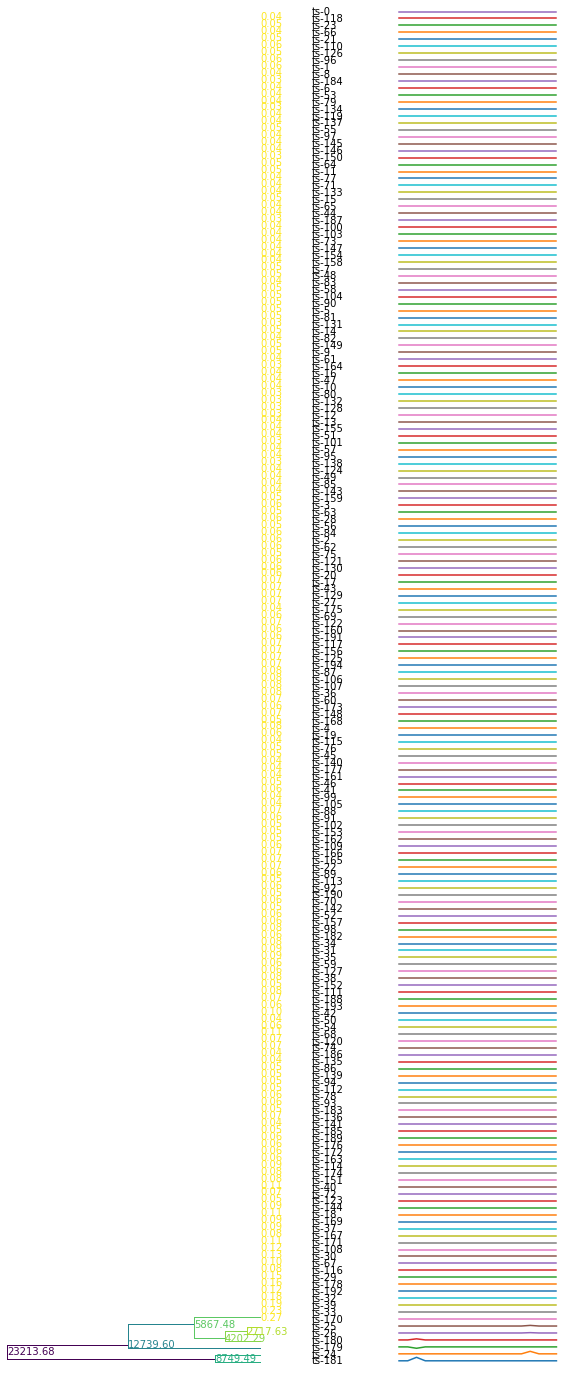

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,25))
show_ts_label= lambda idx: "ts-"+ str(idx)
model2.plot(axes=ax, show_ts_label=show_ts_label,show_tr_label=True,ts_label_margin=-10, ts_left_margin=10, ts_sample_length=1)

(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95a3c5a710>,
       dtype=object))

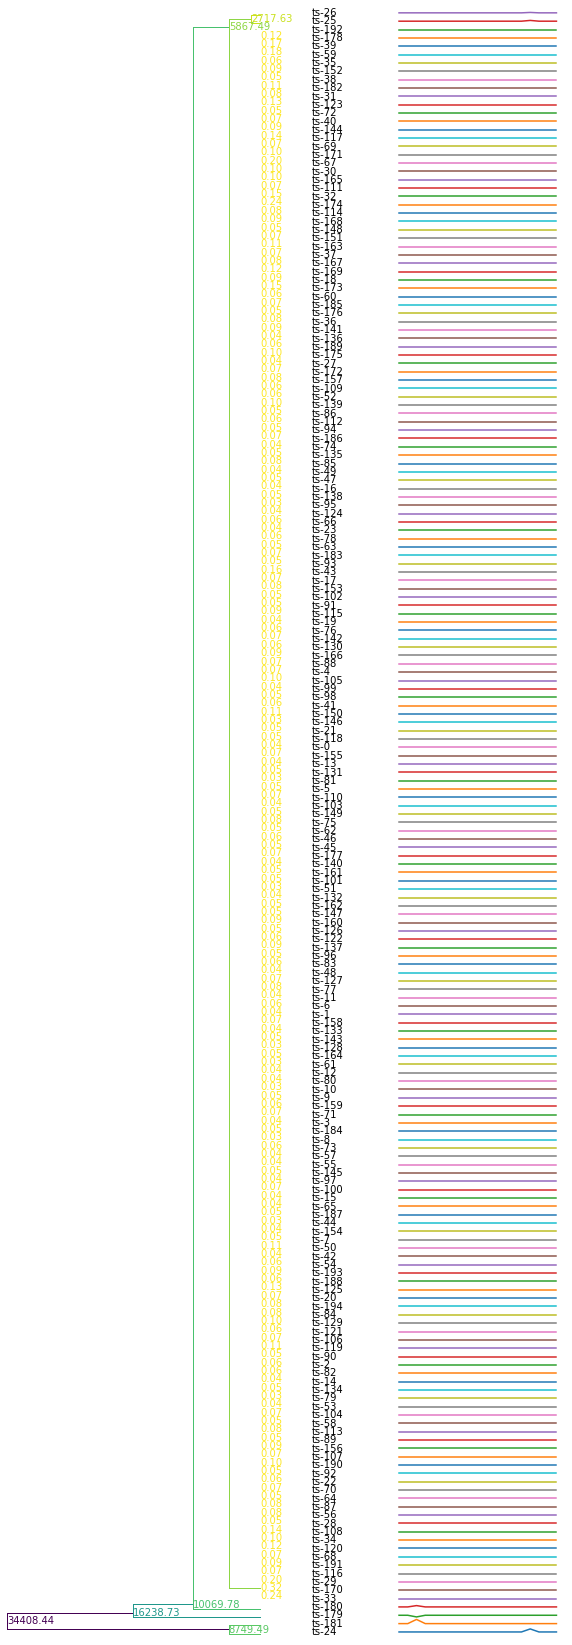

In [ ]:
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(returnsant.values)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 30))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

In [ ]:
trans=pd.DataFrame(returnsant.drop("Factor - Crowding",axis=1).iloc[0:100,:].values.T)

In [ ]:
trans.head(18)

0         1         2         3         4         5         6   \
0   0.008800  0.008300  0.024200  0.014600 -0.032500  0.002900  0.019200   
1  -0.027273  0.036038  0.000317 -0.003192  0.015825  0.010072  0.042557   
2  -0.012632  0.012010 -0.001646  0.002147  0.019188  0.009627  0.035833   
3   0.006403 -0.021316 -0.006682  0.020273  0.029589  0.030382  0.004876   
4  -0.004653  0.012622  0.012469  0.004506 -0.011379  0.019498  0.013868   
5   0.027924  0.008689  0.026956  0.064467 -0.026691 -0.015734 -0.019158   
6  -0.003037 -0.021246 -0.002117  0.006392  0.006959 -0.014250  0.008990   
7   0.028032  0.005813  0.013999  0.013055 -0.052638 -0.006736  0.012305   
8  -0.003735 -0.005763 -0.057169  0.005360 -0.012393 -0.003904  0.022160   
9   0.025687 -0.005889  0.012512 -0.007250 -0.015368 -0.015182 -0.037096   
10  0.022615  0.023366 -0.039254 -0.006414 -0.054605 -0.002810  0.017756   
11 -0.028750  0.005920  0.004665 -0.021774 -0.036699  0.008443 -0.014787   
12  0.009925 -0.005564  0.015684  0.026725  0.016301  0.005050  0.033305   
13  0.008125  0.016747  0.005389  0.006107  0.006757  0.040368  0.020897   
14  0.019915  0.003766  0.000358  0.008849 -0.000345 -0.025039  0.025873   
15 -0.006530 -0.002498 -0.014418 -0.013622  0.005999 -0.006258  0.008558   
16  0.030207 -0.014214  0.008646  0.017130  0.001438  0.004462  0.011642   
17 -0.000626 -0.002882  0.009902  0.008526 -0.001415  0.005680 -0.001137   

          7         8         9   ...        90        91        92        93  \
0   0.016300  0.011100  0.038300  ...  0.020700 -0.005900  0.003200  0.036200   
1   0.011583  0.036836  0.004861  ...  0.002306 -0.029929 -0.007193  0.033148   
2  -0.000827  0.015418  0.005281  ... -0.012419 -0.003802 -0.018756  0.022129   
3  -0.002797 -0.010642  0.010740  ... -0.002199 -0.034166 -0.000081  0.008040   
4  -0.020176 -0.007034 -0.001497  ...  0.020494 -0.005205 -0.029323  0.007885   
5   0.001702  0.006149 -0.004061  ... -0.004791 -0.018491 -0.012585  0.005003   
6  -0.014355 -0.021617  0.013716  ... -0.011090  0.029786 -0.033869 -0.012747   
7   0.020544  0.016057  0.027007  ...  0.043368 -0.018852  0.037918  0.042604   
8   0.028562  0.013978  0.019015  ... -0.020398 -0.014484  0.022197 -0.013378   
9   0.006363 -0.005285 -0.000970  ...  0.005556  0.003251  0.008365 -0.021107   
10  0.000235 -0.001453 -0.002469  ... -0.039317 -0.014687  0.005837 -0.009549   
11 -0.028813  0.010302 -0.014366  ...  0.017913 -0.033440 -0.038892  0.020750   
12  0.025968 -0.014355  0.027804  ...  0.003493 -0.002252 -0.004416  0.008702   
13  0.001508  0.009681 -0.003349  ... -0.011907 -0.008116 -0.012957  0.017875   
14 -0.007470  0.008650  0.033653  ...  0.016215  0.009475 -0.013452  0.019448   
15  0.013663  0.006928 -0.001852  ...  0.005426 -0.004688  0.009504  0.011667   
16 -0.033456 -0.014551  0.003406  ...  0.014227 -0.028414  0.044470  0.010415   
17  0.008943  0.016641 -0.003528  ...  0.007683 -0.007954  0.020750  0.014812   

          94        95        96        97        98        99  
0   0.030800  0.027700  0.016800  0.010000 -0.041000 -0.030900  
1  -0.002302 -0.006668 -0.013704  0.010637  0.035813  0.039048  
2  -0.007118 -0.007145 -0.007880 -0.014528  0.050441  0.037650  
3  -0.009803 -0.025642  0.017828 -0.012986 -0.001877 -0.002645  
4  -0.030571 -0.001379 -0.002203  0.008941 -0.021351  0.016749  
5   0.026147  0.007722 -0.017268 -0.001309 -0.013348  0.014260  
6  -0.011959  0.012212  0.011024  0.029445  0.005837  0.010506  
7   0.015357  0.014225 -0.031313  0.039970 -0.003081  0.012405  
8  -0.023468 -0.012941  0.000323  0.010040  0.038399 -0.010778  
9  -0.005465  0.003151  0.027682  0.001571 -0.013109 -0.026106  
10 -0.019246 -0.023969 -0.021546 -0.027931  0.017550 -0.013879  
11 -0.037528 -0.012565 -0.011645 -0.009479  0.006045 -0.014328  
12 -0.012408 -0.008908 -0.006121 -0.017514  0.006836  0.003467  
13  0.004041  0.008548 -0.004755  0.030999  0.005231  0.011106  
14  0.004495  0.032439  0.011078  0.017200  0.0025

In [ ]:
returnsant.shape

(195, 19)

(None, array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f959db5e690>,
       dtype=object))

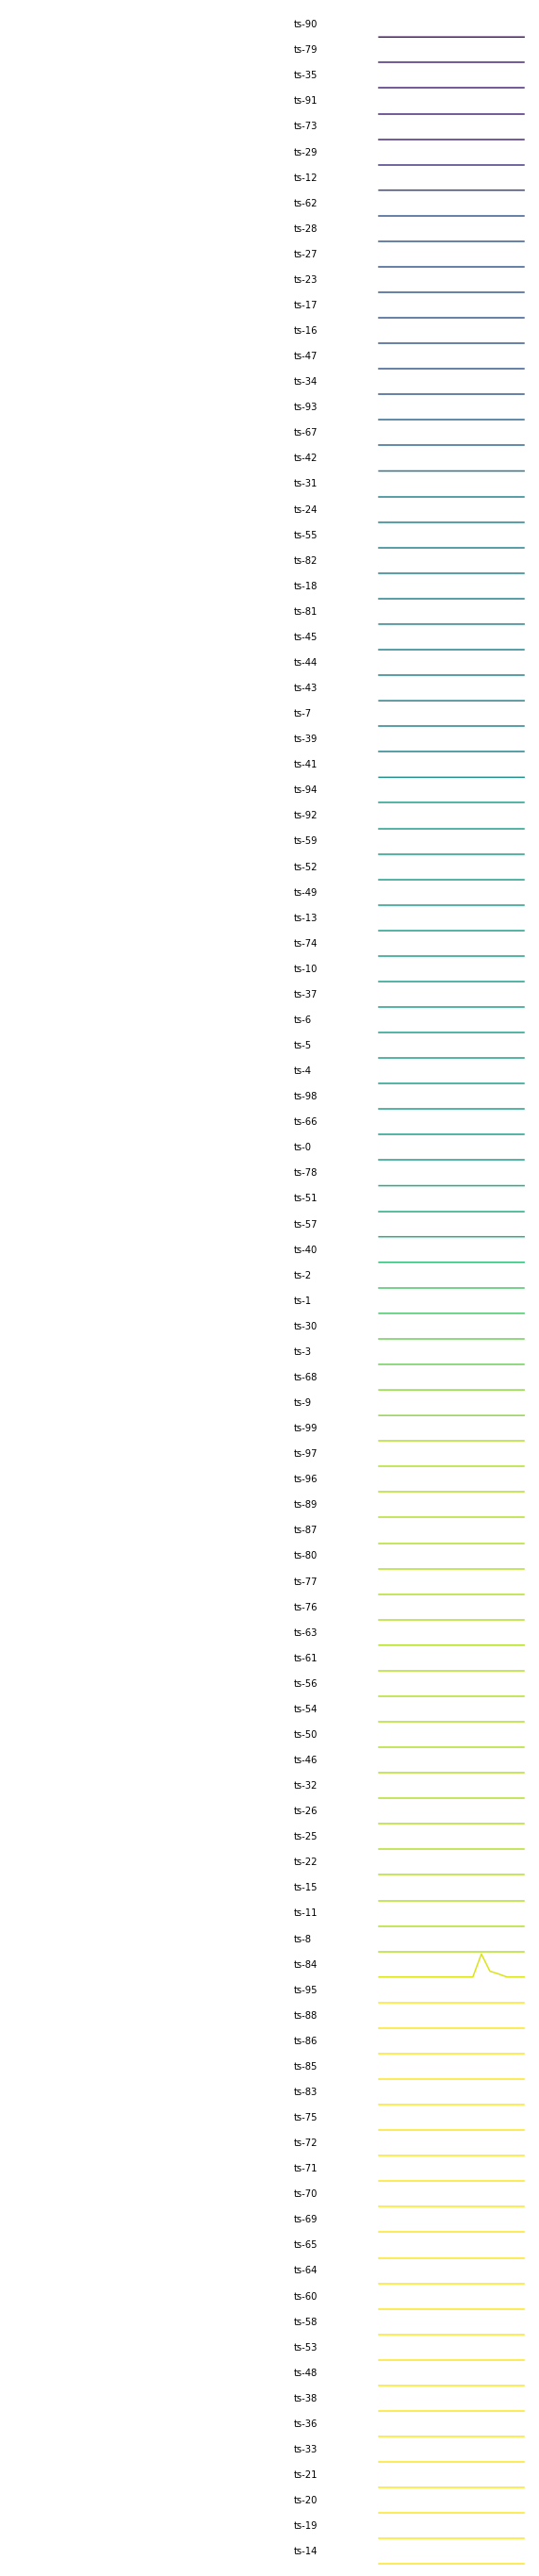

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 50))
show_ts_label = lambda idx: "ts-" + str(idx)
model4.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

In [ ]:
from tslearn.clustering import TimeSeriesKMeans

from sklearn.preprocessing import StandardScaler

In [ ]:
from tslearn.generators import random_walks
X = random_walks(n_ts=50, sz=32, d=1)

In [ ]:
X.shape

(50, 32, 1)

In [ ]:
def rollingWINDOW(X,y, time_steps=4):
    Xs, ys= [], []
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
sc=StandardScaler()
zscored= sc.fit_transform(returnsant)
X_input, y_input = rollingWINDOW(pd.DataFrame(zscored),returnsant["Hedge Fund"])

In [ ]:
X_input.shape

(194, 1, 19)

In [ ]:

cluster_count=np.ceil(np.sqrt(len(returnsant['Factor - Commodities'])))
km=TimeSeriesKMeans(n_clusters=cluster_count, metric='dtw')

#labels=km.predict(returnsant.values)

In [ ]:
! pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
returnsant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hedge Fund                        195 non-null    float64
 1   Factor - Low Risk                 195 non-null    float64
 2   Factor - Value vs Growth          195 non-null    float64
 3   Factor - Fixed Income Carry       195 non-null    float64
 4   Factor - Local Equity             195 non-null    float64
 5   Factor - Trend Following          195 non-null    float64
 6   Factor - Commodities              195 non-null    float64
 7   Factor - Equity                   195 non-null    float64
 8   Factor - Foreign Exchange Carry   195 non-null    float64
 9   Factor - Small Cap                195 non-null    float64
 10  Factor - Emerging Markets         195 non-null    float64
 11  Factor - Foreign Currency         195 non-null    float64
 12  Factor -

In [ ]:
returnsant.shape


(195, 19)

In [ ]:
from minisom import MiniSom
som_x = 1
som_y = 195
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(4, 4, 19, sigma=0.1, learning_rate = 0.1)

som.pca_weights_init(returnsant.values)
som.train(returnsant.values, 1000, verbose=True)

/usr/local/lib/python3.7/dist-packages/minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 282.47787996975194


In [ ]:
import matplotlib.pyplot as plt
def plot_som_series_averaged_center(som_x,som_y,win_map ):
    fig, axs= plt.subplots(som_x,som_y, figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster=(x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c='gray',alpha=0.05)
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c='red')
            cluster_number= x*som_y + y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")
    plt.show()

IndexError: ignored

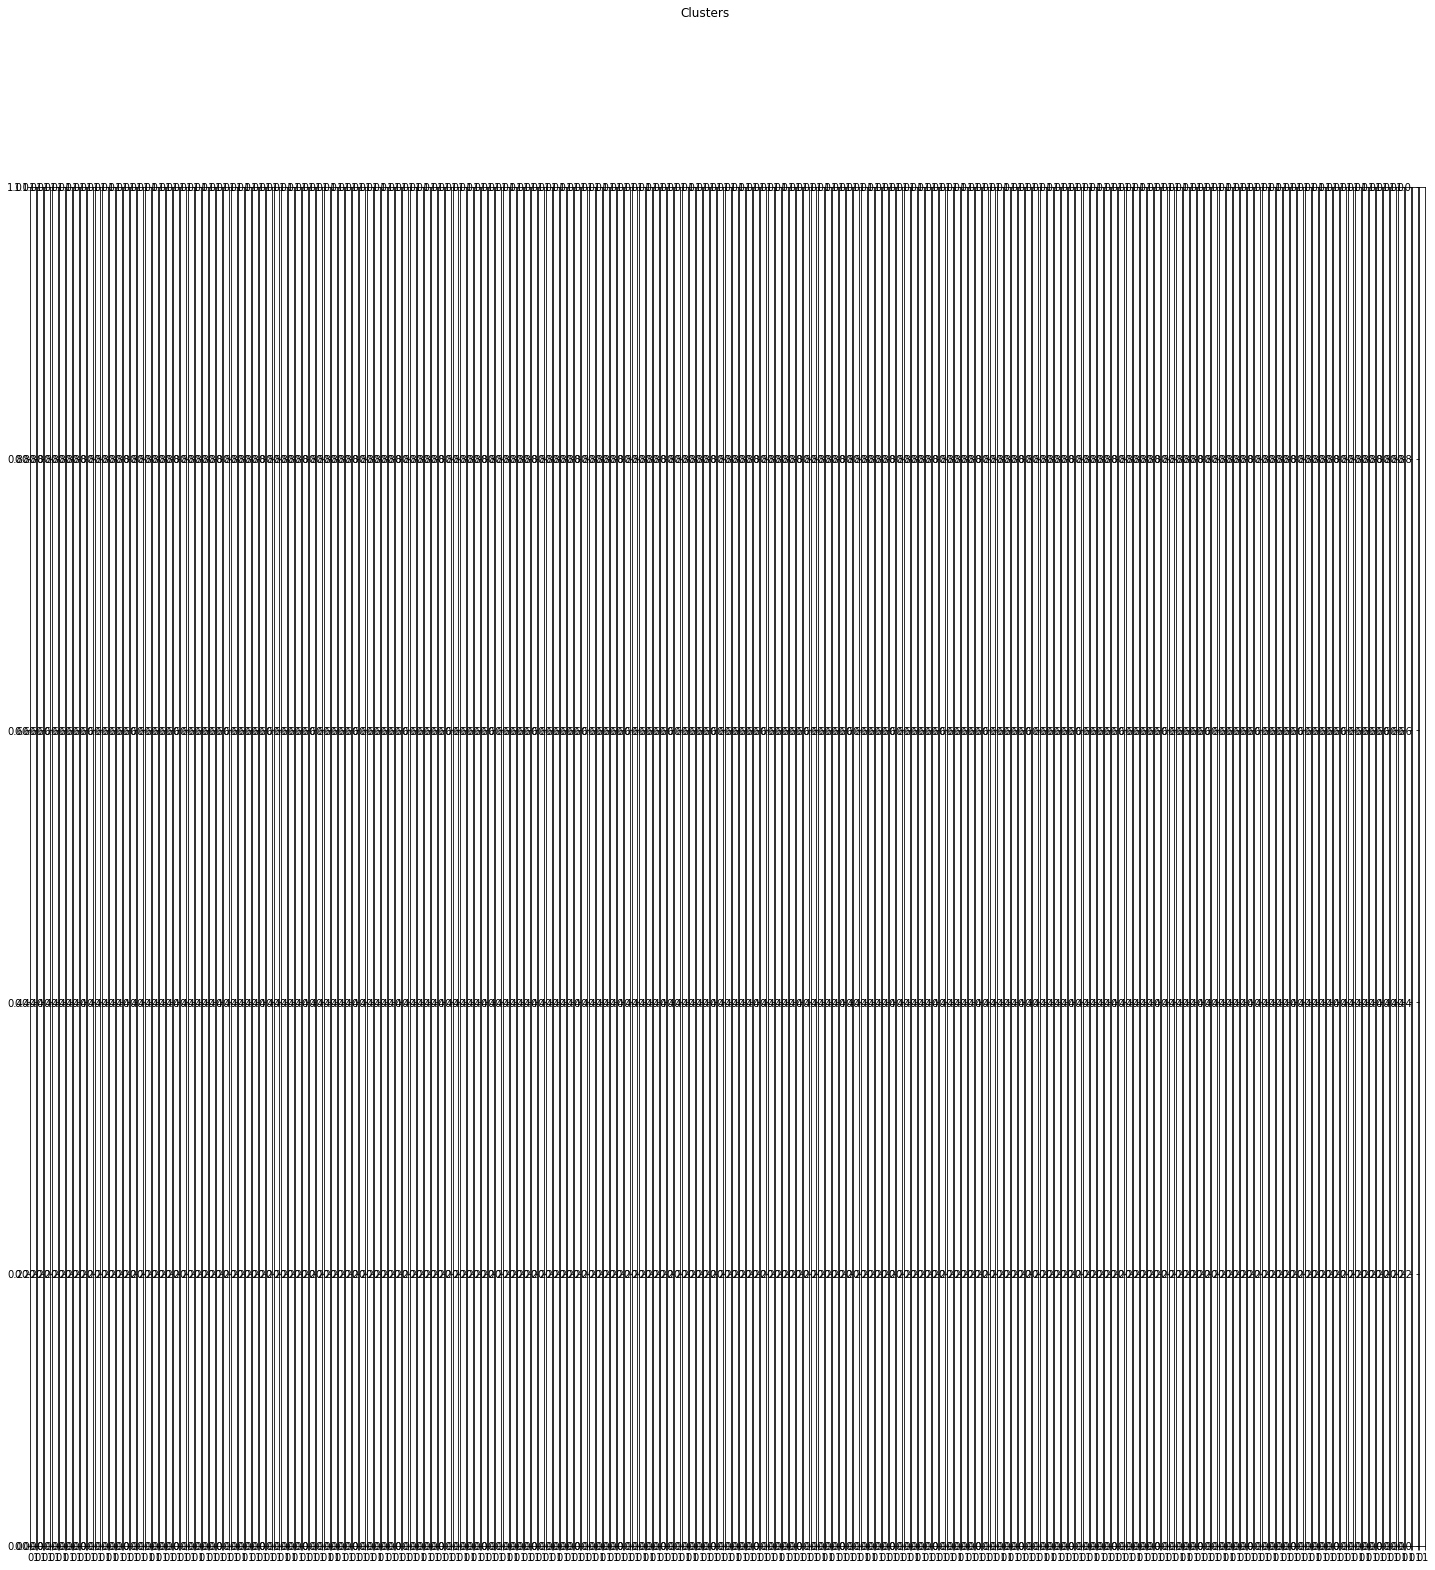

In [ ]:
win_map = som.win_map(returnsant.values)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

In [ ]:
for i in range(0,195):
    
    print(som.winner(returnsant.iloc[i,:]))

ValueError: ignored

In [ ]:
returnsant.index

RangeIndex(start=0, stop=195, step=1)

In [ ]:
names=returnsant.index.values

In [ ]:
returnsant.shape

(195, 19)

In [ ]:
cluster_map = []

for idx in range(0,19):
    winner_node = som.winner(np.array(returnsant.iloc[idx,:]).reshape(-1,1))
    cluster_map.append((names,f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

ValueError: ignored

In [ ]:
labels=km.fit_predict(X_input)

TypeError: ignored

In [ ]:
returnsant.columns

Index(['Hedge Fund', 'Factor - Low Risk', 'Factor - Value vs Growth',
       'Factor - Fixed Income Carry', 'Factor - Local Equity',
       'Factor - Trend Following', 'Factor - Commodities', 'Factor - Equity',
       'Factor - Foreign Exchange Carry', 'Factor - Small Cap',
       'Factor - Emerging Markets', 'Factor - Foreign Currency',
       'Factor - Local Inflation', 'Factor - Equity Short Volatility',
       'Factor - Credit', 'Factor - Interest Rates', 'Factor - Crowding',
       'Factor - Momentum', 'Factor - Quality'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def histogram_boxplot(data,feature,figsize=(12,7),kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True,gridspec_kw={"height_ratios" : (0.25, 0.75)},figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2,  bins=bins, palette="winter")
    #if bins else sns.histplot(
        #data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(),color="green",linestyle="--")
    ax_hist2.axvline(data[feature].median(),color="black",linestyle="--")

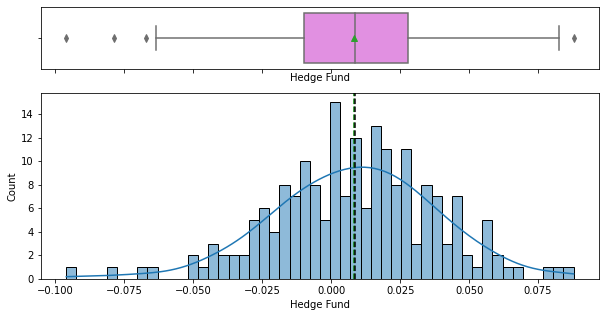

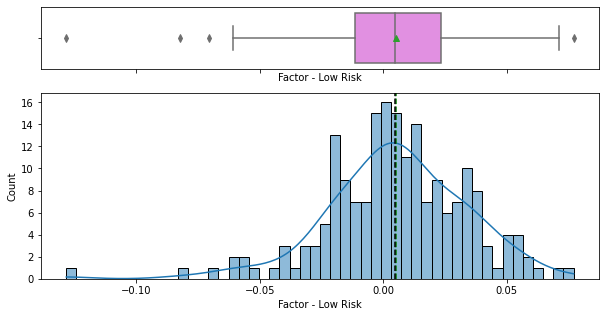

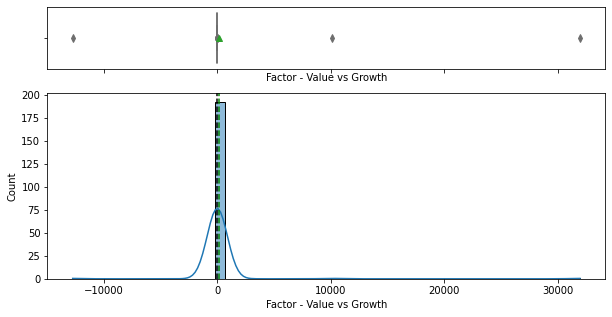

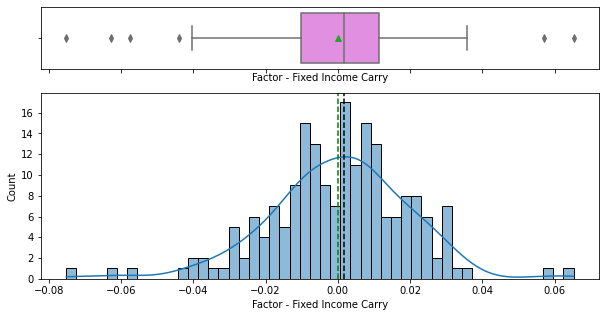

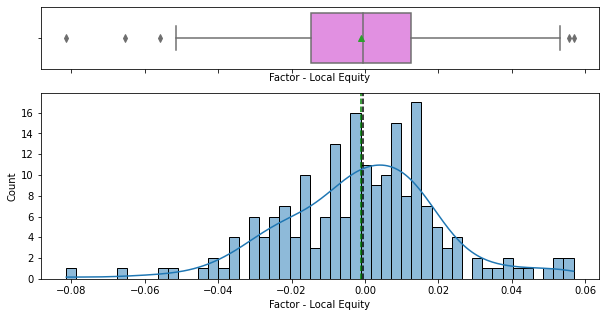

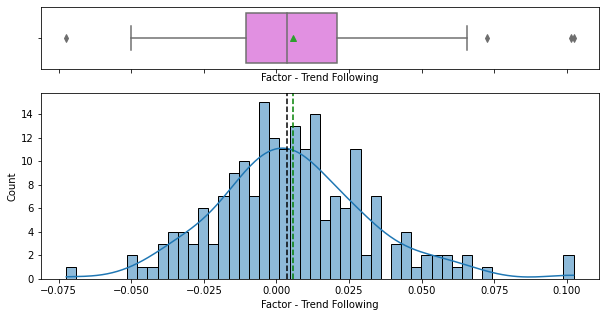

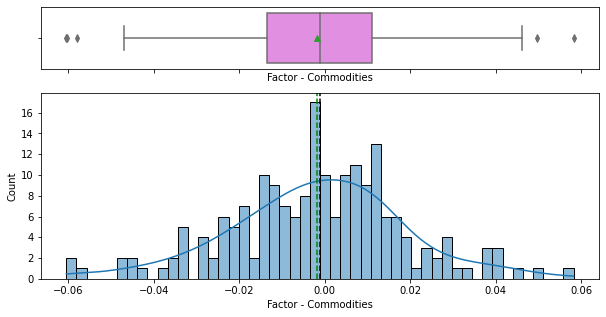

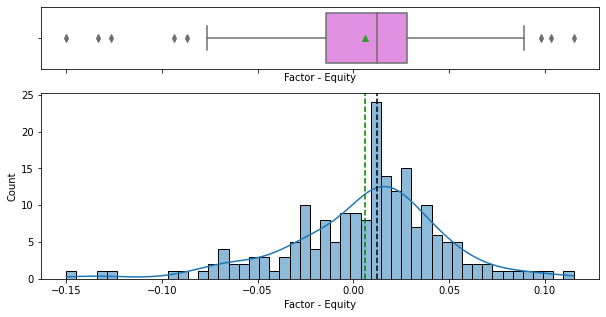

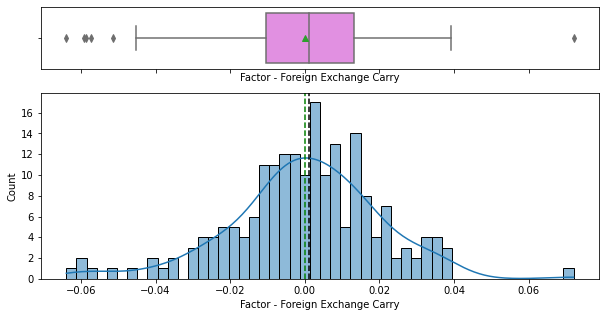

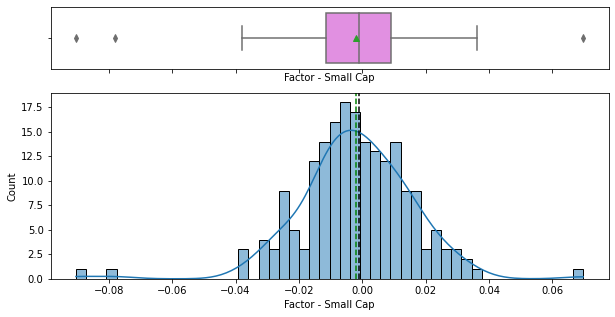

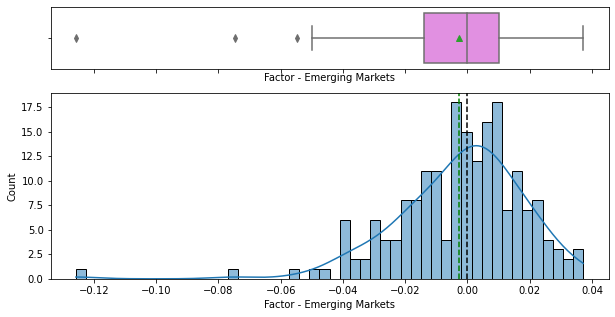

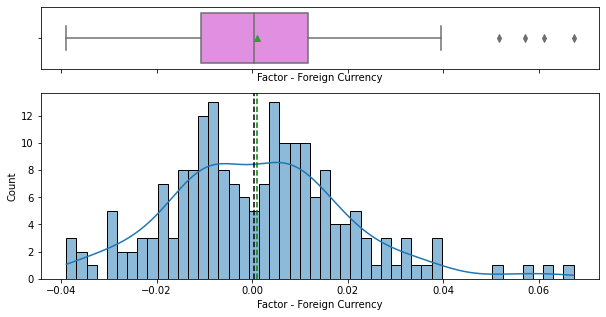

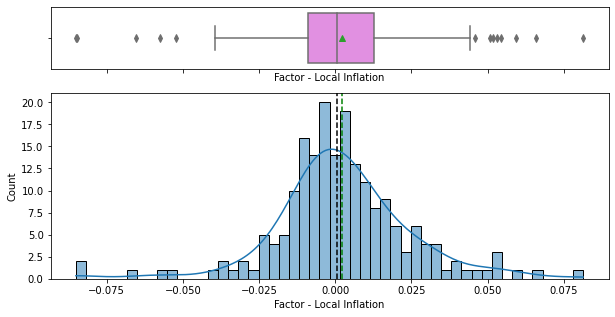

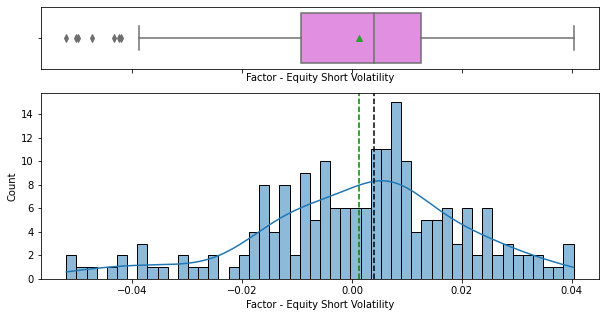

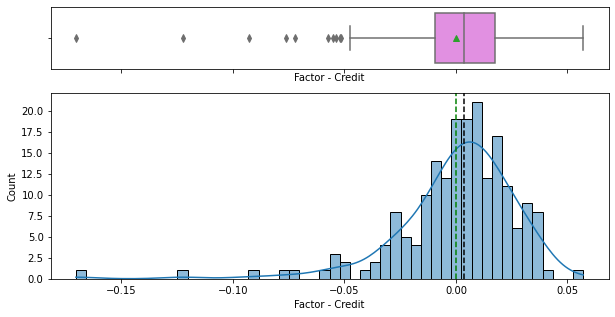

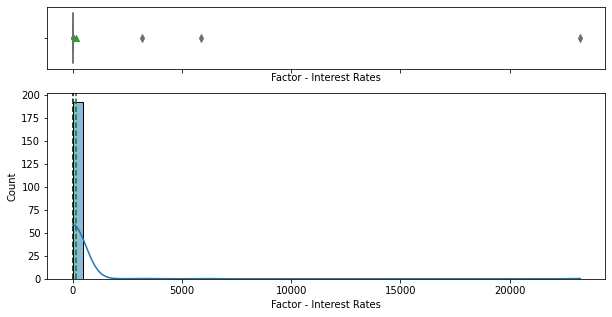

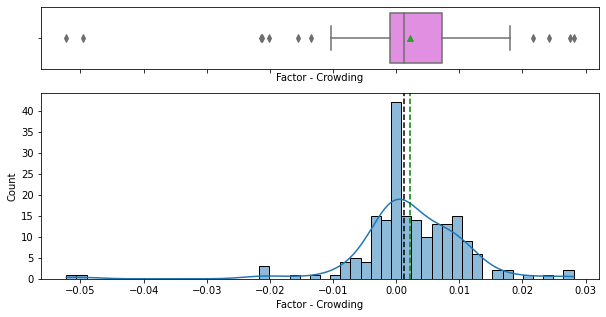

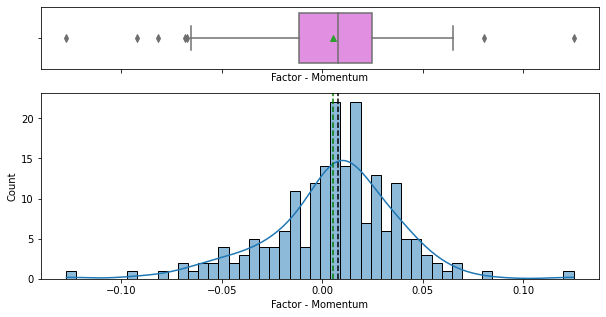

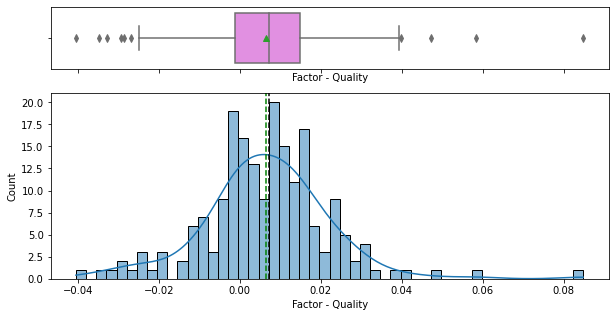

In [ ]:
for feature in returnsant.columns:
    histogram_boxplot(returnsant, feature, bins=50, kde=True, figsize=(10, 5))

In [ ]:
import numpy as np
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    
    # Generate outliers
    indexs=[]
    i=0
    for outlier in data:
        # Set upper and lower limit to 3 standard deviation
        data_std = np.std(data)
        data_mean = np.median(data)
        cut_off = data_std * 3
    
        lower_limit  = data_mean - cut_off 
        upper_limit = data_mean + cut_off
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            indexs.append(i)
            data[i]=data_mean
        i+=1
    print("The anomalies are at indexs {} with values {}".format(anomalies,indexs))
    return data

In [ ]:
find_anomalies(returnsant['Factor - Value vs Growth'])

The anomalies are at indexs [179, 180, 181, 192] with values [-12739.63101, 10069.79161, 31963.20149, 0.126822666]


0     -0.012632
1      0.012010
2     -0.001646
3      0.002147
4      0.019188
         ...   
190    0.005199
191    0.044041
192   -0.000972
193    0.011823
194    0.011146
Name: Factor - Value vs Growth, Length: 195, dtype: float64

In [ ]:
returnsant['Factor - Value vs Growth'].describe()

count    195.000000
mean      -0.000895
std        0.025233
min       -0.126148
25%       -0.015122
50%       -0.000972
75%        0.010633
max        0.090296
Name: Factor - Value vs Growth, dtype: float64

In [ ]:
find_anomalies(returnsant['Factor - Interest Rates'])

The anomalies are at indexs [24, 25, 26, 34, 194] with values [23213.71104, 5867.505916, 3149.873353, 0.035962977, -0.028067551]


0     -0.006530
1     -0.002498
2     -0.014418
3     -0.013622
4      0.005999
         ...   
190    0.012773
191   -0.005114
192   -0.013568
193   -0.009306
194    0.002805
Name: Factor - Interest Rates, Length: 195, dtype: float64

In [ ]:
returnsant['Factor - Interest Rates'].describe()

count    195.000000
mean       0.002368
std        0.009687
min       -0.021461
25%       -0.003911
50%        0.002805
75%        0.008740
max        0.028664
Name: Factor - Interest Rates, dtype: float64

In [ ]:
returnsant.describe()

Hedge Fund  Factor - Low Risk  Factor - Value vs Growth  \
count  195.000000         195.000000                195.000000   
mean     0.008426           0.005162                 -0.000895   
std      0.029623           0.028541                  0.025233   
min     -0.096051          -0.128207                 -0.126148   
25%     -0.009950          -0.011406                 -0.015122   
50%      0.008800           0.004758                 -0.000972   
75%      0.028000           0.023451                  0.010633   
max      0.087900           0.076999                  0.090296   

       Factor - Fixed Income Carry  Factor - Local Equity  \
count                   195.000000             195.000000   
mean                      0.000084              -0.000999   
std                       0.019464               0.021516   
min                      -0.075152              -0.081331   
25%                      -0.010146              -0.014698   
50%                       0.001565              -0.000484   
75%                       0.011342               0.012546   
max                       0.065239               0.056810   

       Factor - Trend Following  Factor - Commodities  Factor - Equity  \
count                195.000000            195.000000       195.000000   
mean                   0.005613             -0.001761         0.006200   
std                    0.026661              0.020470         0.040760   
min                   -0.072346             -0.060501        -0.149934   
25%                   -0.010551             -0.013445        -0.014444   
50%                    0.003492             -0.001189         0.012433   
75%                    0.020816              0.011129         0.028201   
max                    0.102276              0.058252         0.115115   

       Factor - Foreign Exchange Carry  Factor - Small Cap  \
count                       195.000000          195.000000   
mean                         -0.000083           -0.002021   
std                           0.020065            0.018025   
min                          -0.063892           -0.090379   
25%                          -0.010376           -0.011469   
50%                           0.001187           -0.001049   
75%                           0.013087            0.009227   
max                           0.071994            0.069783   

       Factor - Emerging Markets  Factor - Foreign Currency  \
count                 195.000000                 195.000000   
mean                   -0.002571                   0.001120   
std                     0.020904                   0.018551   
min                    -0.125790                  -0.038892   
25%                    -0.013991                  -0.010622   
50%                    -0.000205                   0.000475   
75%                     0.010226                   0.011589   
max                     0.037207                   0.067272   

       Factor - Local Inflation  Factor - Equity Short Volatility  \
count                195.000000                        195.000000   
mean                   0.002171                          0.001245   
std                    0.022432                          0.018643   
min                   -0.085123                         -0.052001   
25%                   -0.008966                         -0.009227   
50%                    0.000509                          0.004018   
75%                    0.012679                          0.012631   
max                    0.081401                          0.040368   

       Factor - Credit  Factor - Interest Rates  Factor - Crowding  \
count       195.000000               195.000000         195.000000   
mean          0.000228                 0.002368           0.002219   
std           0.027555                 0.009687           0.009019   
min          -0.170308                -0.021461          -0.052240   
25%          -0.009373                -0.003911          -0.000932   
50%           0.003766    

In [ ]:
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

In [ ]:
sc = StandardScaler()
subset_scaled_df = sc.fit_transform(returnsant)
subset_scaled_df=pd.DataFrame(subset_scaled_df)
subset_scaled_df.head()
subset_scaled_df.columns=returnsant.columns

Number of Clusters: 1 	Average Distortion: 4.0733165010131085
Number of Clusters: 2 	Average Distortion: 3.891019954516652
Number of Clusters: 3 	Average Distortion: 3.8265580337958895
Number of Clusters: 4 	Average Distortion: 3.7172378343598216
Number of Clusters: 5 	Average Distortion: 3.654256783619731
Number of Clusters: 6 	Average Distortion: 3.5670780028491897
Number of Clusters: 7 	Average Distortion: 3.5285243125098544
Number of Clusters: 8 	Average Distortion: 3.474003817705447
Number of Clusters: 9 	Average Distortion: 3.414467317524152
Number of Clusters: 10 	Average Distortion: 3.398223273274847
Number of Clusters: 11 	Average Distortion: 3.3467311847963592
Number of Clusters: 12 	Average Distortion: 3.2880092805728807
Number of Clusters: 13 	Average Distortion: 3.2599874478030744
Number of Clusters: 14 	Average Distortion: 3.2130917982043066
Number of Clusters: 15 	Average Distortion: 3.185210367116287
Number of Clusters: 16 	Average Distortion: 3.152419168031806
Number o

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

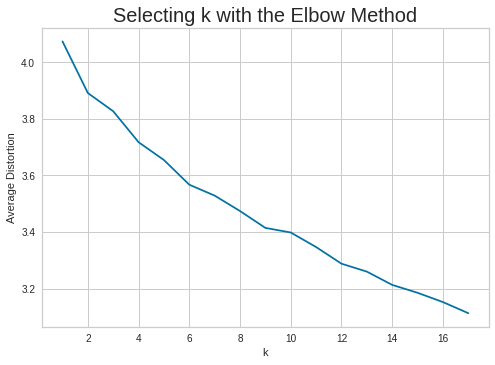

In [ ]:
clusters=range(1,18)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [ ]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.08275784923048544)
For n_clusters = 3, silhouette score is 0.09535261782086678)
For n_clusters = 4, silhouette score is 0.07214185405312556)
For n_clusters = 5, silhouette score is 0.05632754052924484)
For n_clusters = 6, silhouette score is 0.044609544586842895)
For n_clusters = 7, silhouette score is 0.057668263107064265)
For n_clusters = 8, silhouette score is 0.04610941326527456)
For n_clusters = 9, silhouette score is 0.031055976003804164)


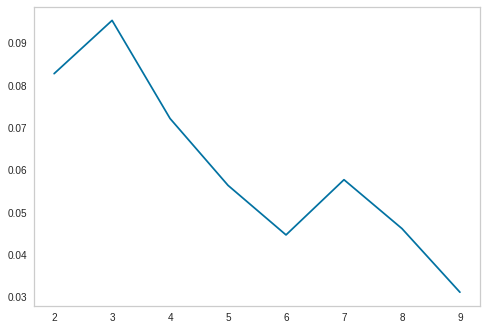

In [ ]:
plt.plot(cluster_list,sil_score)
plt.grid()

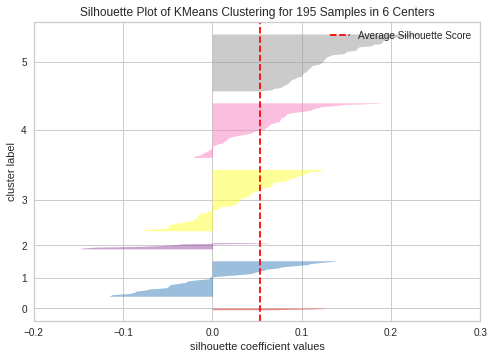

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=0)

In [ ]:
returnsant['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [ ]:
cluster_profile = returnsant.groupby('K_means_segments').mean()

In [ ]:
cluster_profile['count_in_each_segments'] = returnsant.groupby('K_means_segments')['Hedge Fund'].count().values

In [ ]:
cluster_profile

Hedge Fund  Factor - Low Risk  Factor - Value vs Growth  \
K_means_segments                                                            
0                   0.041150          -0.085203                 -0.053801   
1                   0.027658          -0.006284                 -0.023521   
2                  -0.011322          -0.024905                  0.014507   
3                  -0.009374           0.028713                  0.015210   
4                   0.010405           0.007443                  0.001768   
5                   0.022158           0.022335                 -0.014138   

                  Factor - Fixed Income Carry  Factor - Local Equity  \
K_means_segments                                                       
0                                   -0.037391               0.012037   
1                                    0.013853               0.002932   
2                                   -0.006693              -0.010377   
3                                   -0.001887               0.008638   
4                                    0.002591               0.002723   
5                                   -0.011044              -0.019525   

                  Factor - Trend Following  Factor - Commodities  \
K_means_segments                                                   
0                                 0.056858             -0.059244   
1                                 0.008470              0.004165   
2                                -0.012389              0.004867   
3                                 0.001648             -0.011230   
4                                 0.008307              0.004310   
5                                 0.016210             -0.015854   

                  Factor - Equity  Factor - Foreign Exchange Carry  \
K_means_segments                                                     
0                       -0.138154                        -0.016739   
1                       -0.013191                        -0.000008   
2                        0.026398                         0.003099   
3                       -0.022719                         0.000176   
4                        0.023982                         0.003658   
5                        0.010445                        -0.012865   

                  Factor - Small Cap  Factor - Emerging Markets  \
K_means_segments                                                  
0                          -0.084148                  -0.100314   
1                           0.003727                   0.010893   
2                           0.015601                  -0.001215   
3                          -0.009933                   0.005314   
4                          -0.002766                  -0.006785   
5                          -0.010000                  -0.012926   

                  Factor - Foreign Currency  Factor - Local Inflation  \
K_means_segments                                                        
0                                  0.041428                 -0.049232   
1                                  0.007490                  0.000386   
2                                 -0.010884                 -0.003568   
3                                  0.013288                  0.005700   
4                                  0.000057                  0.006579   
5                                 -0.010196                 -0.001830   

                  Factor - Equity Short Volatility  Factor - Credit  \
K_means_segments                                                      
0                                        -0.047061        -0.112062   
1                                        -0.000954        -0.011512   
2                                        -0.006490         0.012978   
3                                         0.009070        -0.016211   
4                                         0.002058         0.014066   
5                                         0.003654        -0.005586   

                  Factor - 

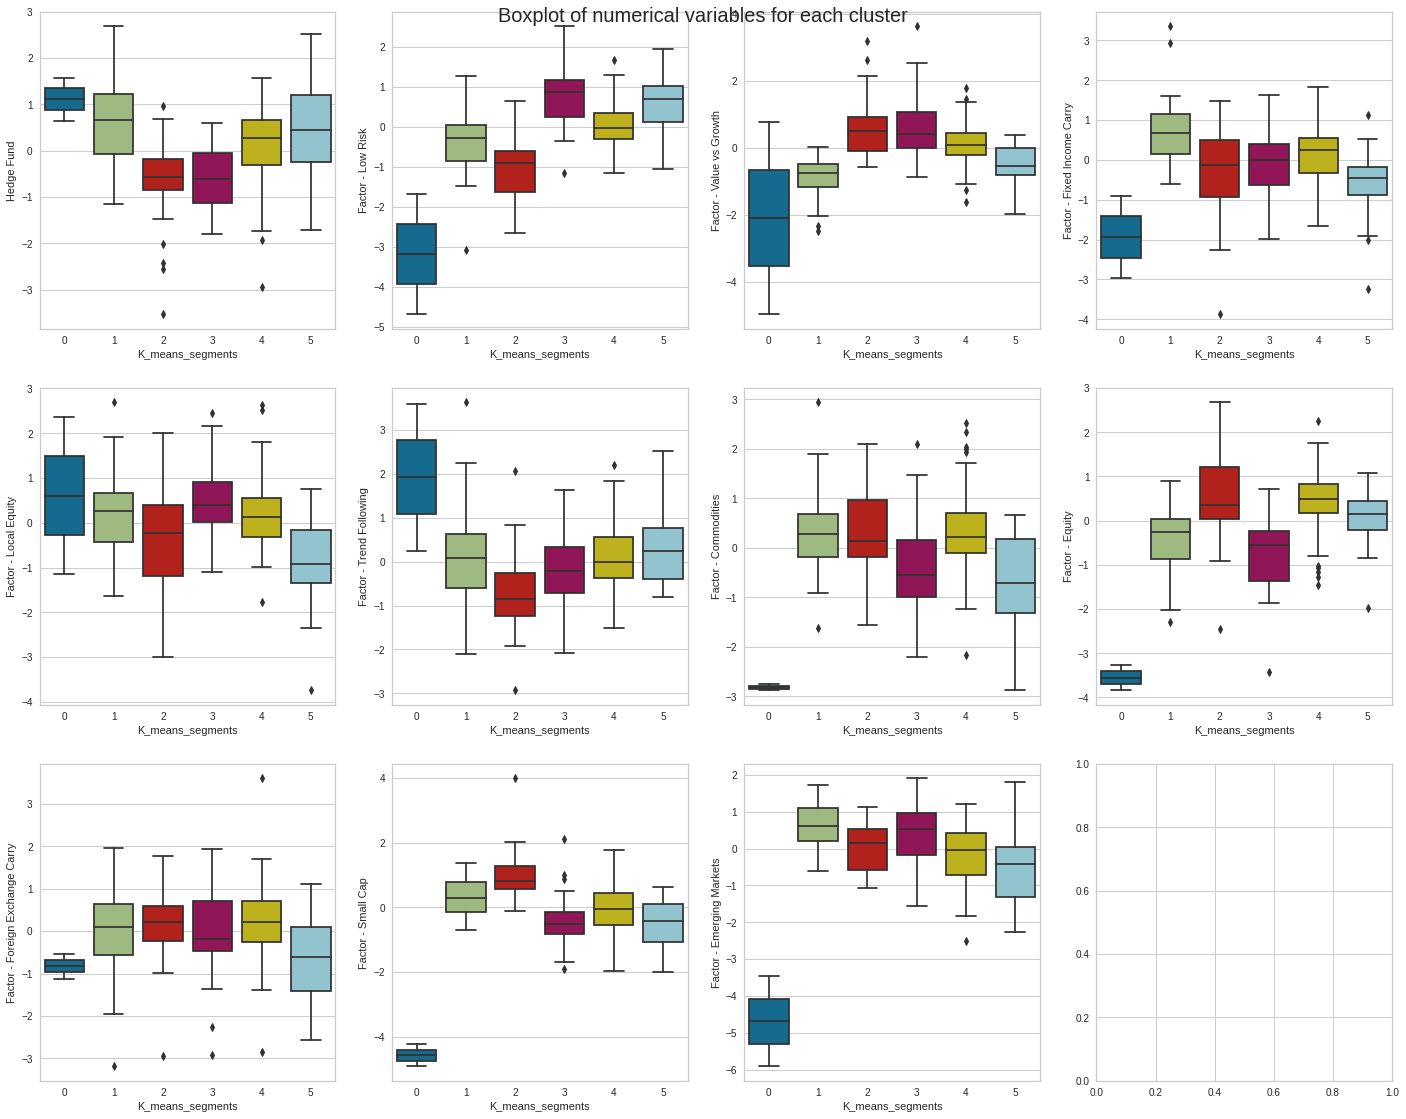

In [ ]:
num_cols = returnsant.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

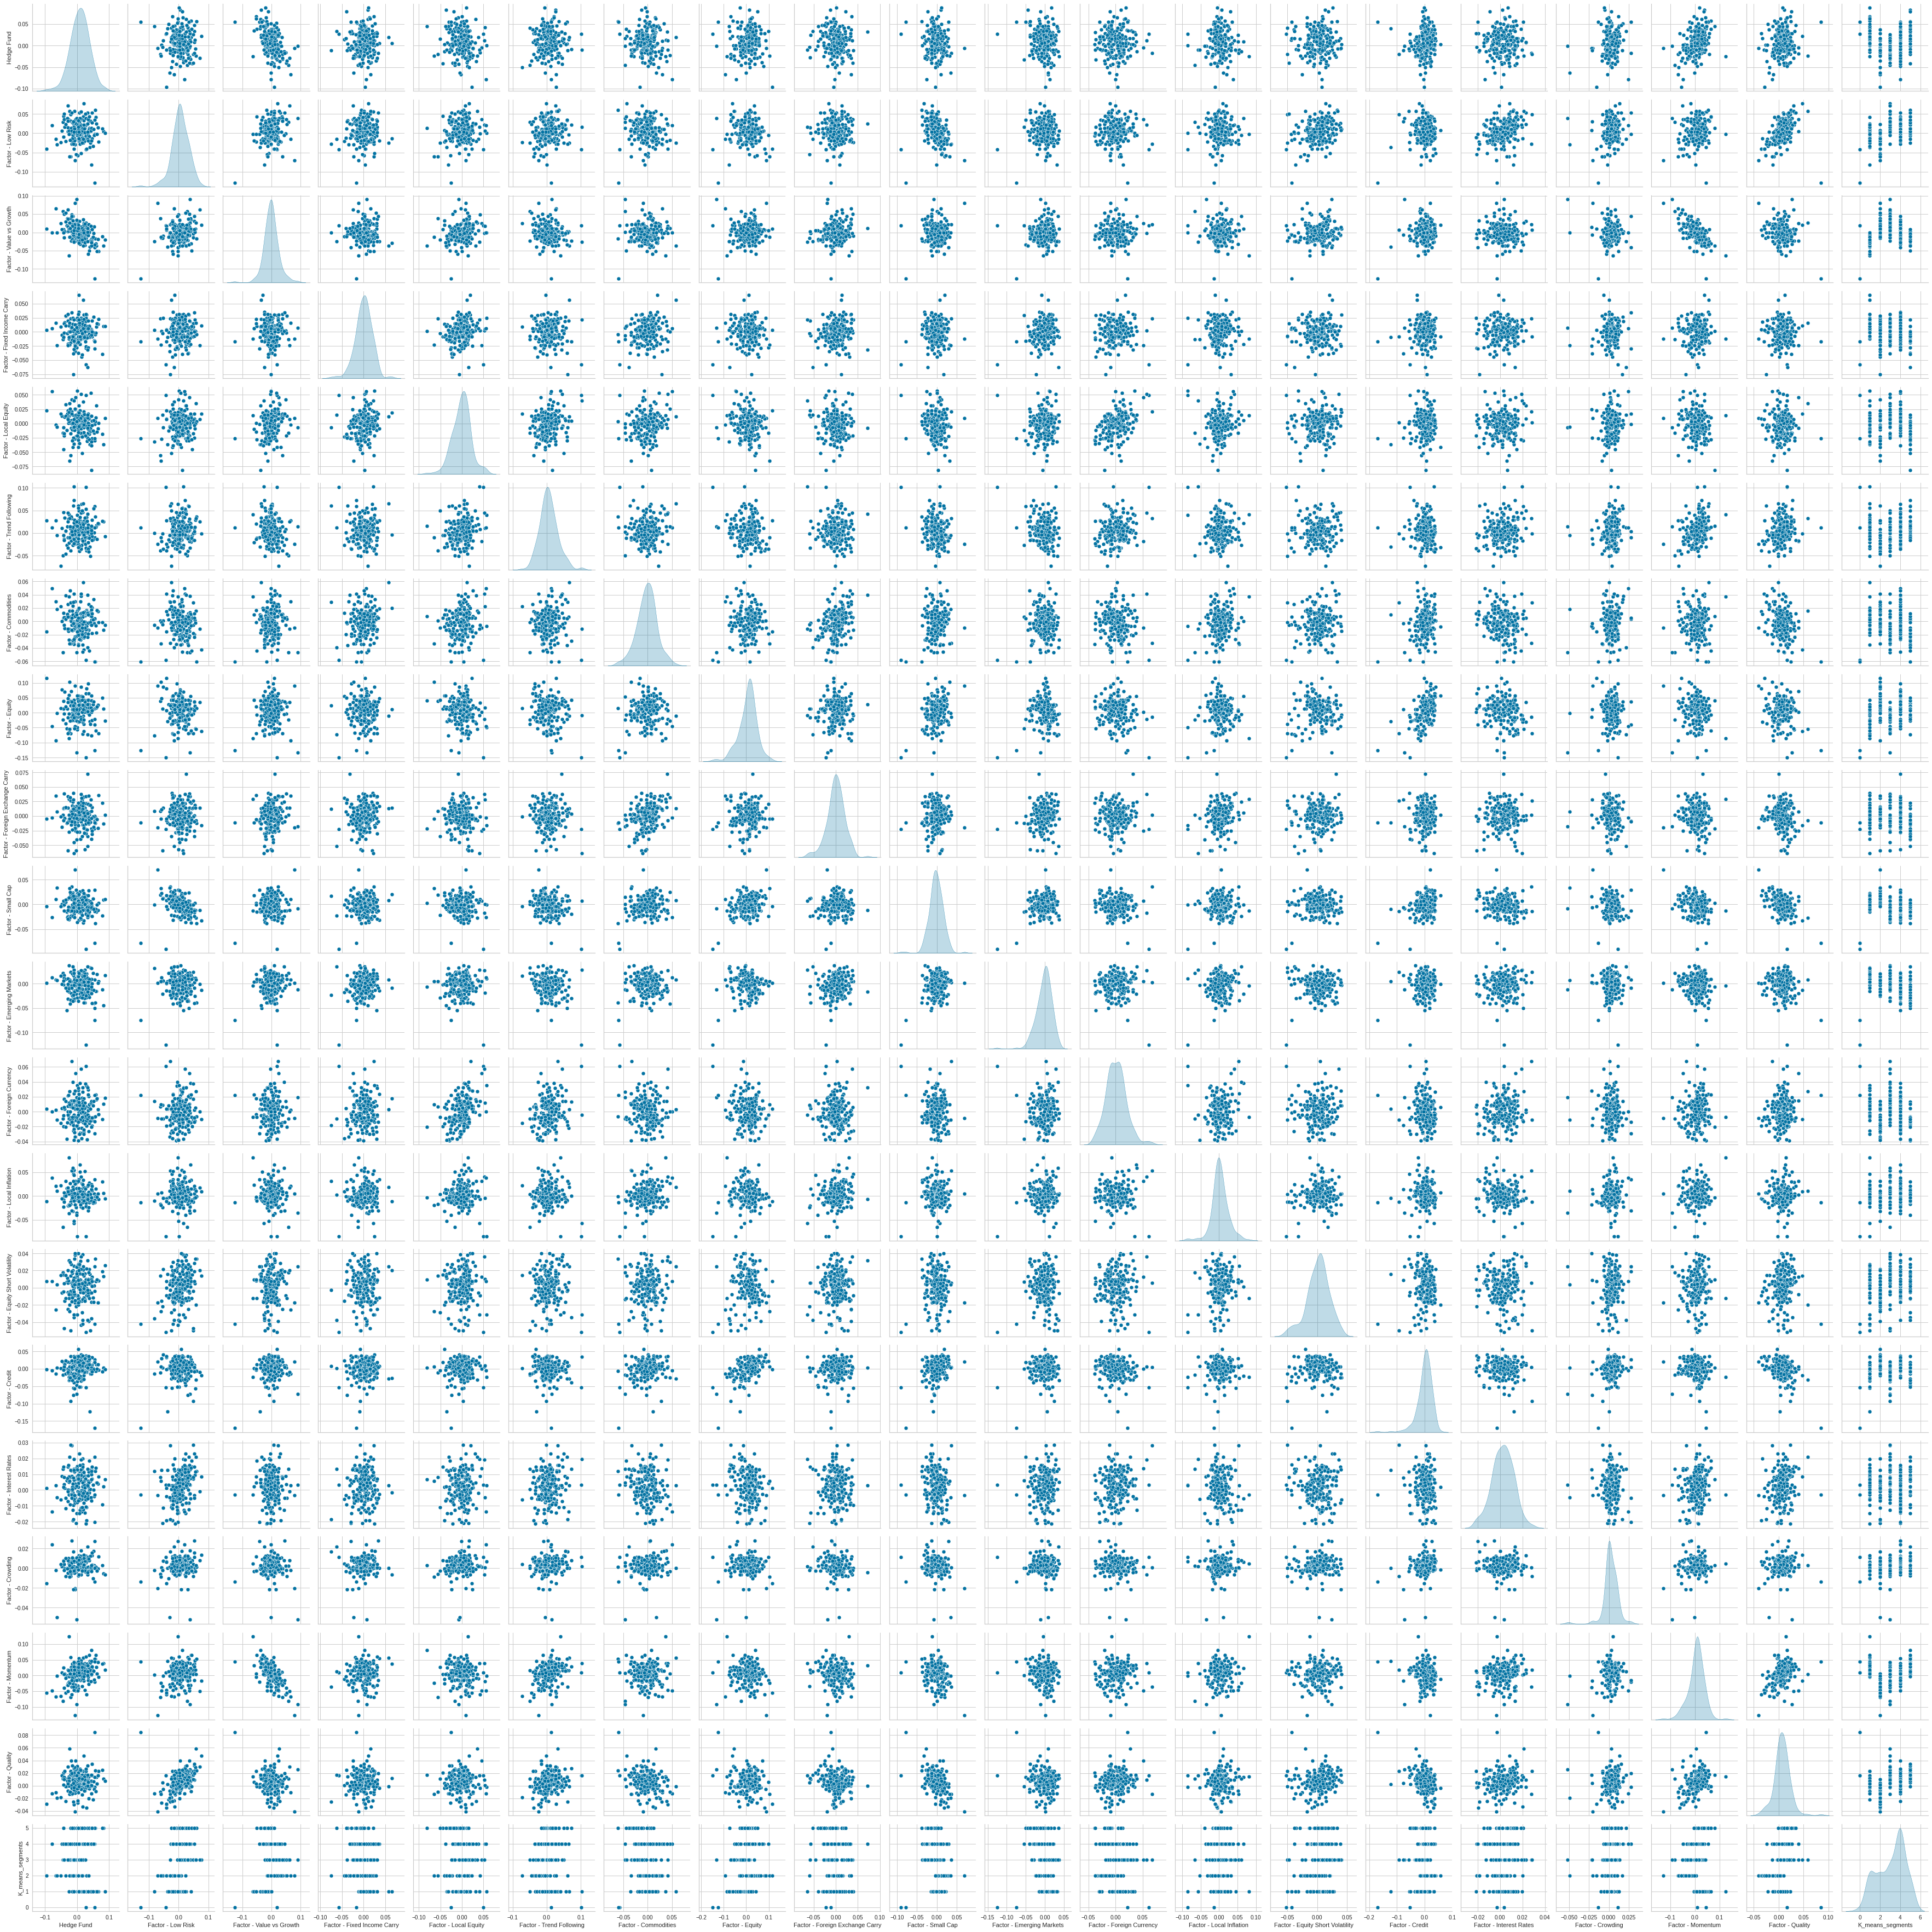

In [ ]:
sns.pairplot(returnsant[num_cols],diag_kind="kde");

In [ ]:
returns=np.zeros(len(returnsant.columns))
risk=np.zeros(len(returnsant.columns))
for i, feature in enumerate(returnsant.columns):
    returns[i]=returnsant[feature].sum()
    risk[i]= (np.std(returnsant[feature].values))**(1/2)
sharperatio =returns/risk

In [ ]:
sharperatio

array([ 9.55852376e+00,  5.96652338e+00, -1.10031136e+00,  1.18207765e-01,
       -1.32957903e+00,  6.71219119e+00, -2.40389640e+00,  5.99642127e+00,
       -1.14379076e-01, -2.93969982e+00, -3.47257656e+00,  1.60519613e+00,
        2.82984809e+00,  1.77991580e+00,  2.67683043e-01,  4.69779110e+00,
        4.56273015e+00,  5.81438329e+00,  1.01618529e+01,  5.23281558e+02])

In [ ]:
risk

array([0.17189141, 0.1687226 , 0.15864505, 0.1393328 , 0.14649507,
       0.16307166, 0.14288956, 0.2016325 , 0.14146762, 0.1340855 ,
       0.14439718, 0.13602783, 0.14957936, 0.1363626 , 0.16578346,
       0.09829438, 0.09484476, 0.17884168, 0.12523227, 1.15807636])

In [ ]:
result=pd.DataFrame(sharperatio,returnsant.columns)

In [ ]:
result['risk']=risk

In [ ]:
result.columns=['sharpe ratio','risk']

In [ ]:
result=result.drop("K_means_segments",axis=0)

In [ ]:
result

sharpe ratio      risk
Hedge Fund                            9.558524  0.171891
Factor - Low Risk                     5.966523  0.168723
Factor - Value vs Growth             -1.100311  0.158645
Factor - Fixed Income Carry           0.118208  0.139333
Factor - Local Equity                -1.329579  0.146495
Factor - Trend Following              6.712191  0.163072
Factor - Commodities                 -2.403896  0.142890
Factor - Equity                       5.996421  0.201632
Factor - Foreign Exchange Carry      -0.114379  0.141468
Factor - Small Cap                   -2.939700  0.134086
Factor - Emerging Markets            -3.472577  0.144397
Factor - Foreign Currency             1.605196  0.136028
Factor - Local Inflation              2.829848  0.149579
Factor - Equity Short Volatility      1.779916  0.136363
Factor - Credit                       0.267683  0.165783
Factor - Interest Rates               4.697791  0.098294
Factor - Crowding                     4.562730  0.094845
Factor - Momentum                     5.814383  0.178842
Factor - Quality                     10.161853  0.125232

In [ ]:
result['Factors']=result.index

In [ ]:
result

sharpe ratio      risk  \
Hedge Fund                            9.558524  0.171891   
Factor - Low Risk                     5.966523  0.168723   
Factor - Value vs Growth             -1.100311  0.158645   
Factor - Fixed Income Carry           0.118208  0.139333   
Factor - Local Equity                -1.329579  0.146495   
Factor - Trend Following              6.712191  0.163072   
Factor - Commodities                 -2.403896  0.142890   
Factor - Equity                       5.996421  0.201632   
Factor - Foreign Exchange Carry      -0.114379  0.141468   
Factor - Small Cap                   -2.939700  0.134086   
Factor - Emerging Markets            -3.472577  0.144397   
Factor - Foreign Currency             1.605196  0.136028   
Factor - Local Inflation              2.829848  0.149579   
Factor - Equity Short Volatility      1.779916  0.136363   
Factor - Credit                       0.267683  0.165783   
Factor - Interest Rates               4.697791  0.098294   
Factor - Crowding                     4.562730  0.094845   
Factor - Momentum                     5.814383  0.178842   
Factor - Quality                     10.161853  0.125232   

                                                           Factors  
Hedge Fund                                              Hedge Fund  
Factor - Low Risk                                Factor - Low Risk  
Factor - Value vs Growth                  Factor - Value vs Growth  
Factor - Fixed Income Carry            Factor - Fixed Income Carry  
Factor - Local Equity                        Factor - Local Equity  
Factor - Trend Following                  Factor - Trend Following  
Factor - Commodities                          Factor - Commodities  
Factor - Equity                                    Factor - Equity  
Factor - Foreign Exchange Carry    Factor - Foreign Exchange Carry  
Factor - Small Cap                              Factor - Small Cap  
Factor - Emerging Markets                Factor - Emerging Markets  
Factor - Foreign Currency                Factor - Foreign Currency  
Factor - Local Inflation                  Factor - Local Inflation  
Factor - Equity Short Volatility  Factor - Equity Short Volatility  
Factor - Credit                                    Factor - Credit  
Factor - Interest Rates                    Factor - Interest Rates  
Factor - Crowding                                Factor - Crowding  
Factor - Momentum                                Factor - Momentum  
Factor - Quality                                  Factor - Quality

Number of Clusters: 1 	Average Distortion: 3.4976694388410423
Number of Clusters: 2 	Average Distortion: 1.6281599434250043
Number of Clusters: 3 	Average Distortion: 1.194180445212912
Number of Clusters: 4 	Average Distortion: 0.7723286143471945
Number of Clusters: 5 	Average Distortion: 0.5430684830943163
Number of Clusters: 6 	Average Distortion: 0.4025105675662853
Number of Clusters: 7 	Average Distortion: 0.2713708528468821
Number of Clusters: 8 	Average Distortion: 0.20075103327235938
Number of Clusters: 9 	Average Distortion: 0.15051079681868904
Number of Clusters: 10 	Average Distortion: 0.12197553978490099
Number of Clusters: 11 	Average Distortion: 0.09012655501592956
Number of Clusters: 12 	Average Distortion: 0.06207516013064676
Number of Clusters: 13 	Average Distortion: 0.04836458682022085
Number of Clusters: 14 	Average Distortion: 0.03628093475782718
Number of Clusters: 15 	Average Distortion: 0.026636073300528588
Number of Clusters: 16 	Average Distortion: 0.0174402844

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

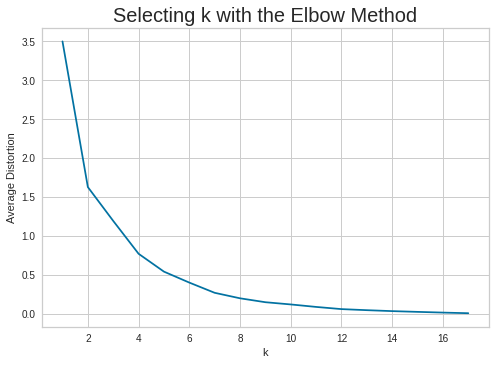

In [ ]:
clusters=range(1,18)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(result.values)
    prediction=model.predict(result.values)
    distortion=sum(np.min(cdist(result.values, model.cluster_centers_, 'euclidean'), axis=1)) / result.values.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [ ]:
sil_score = []
cluster_list = list(range(2,14))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((result.values))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(result.values, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6384679555394835)
For n_clusters = 3, silhouette score is 0.6328211659468999)
For n_clusters = 4, silhouette score is 0.6268188964239423)
For n_clusters = 5, silhouette score is 0.6551988181858405)
For n_clusters = 6, silhouette score is 0.6714135892702079)
For n_clusters = 7, silhouette score is 0.7131826278060881)
For n_clusters = 8, silhouette score is 0.7205244611873971)
For n_clusters = 9, silhouette score is 0.7005853864230376)
For n_clusters = 10, silhouette score is 0.6371092124296935)
For n_clusters = 11, silhouette score is 0.5522674216110712)
For n_clusters = 12, silhouette score is 0.5255996991611397)
For n_clusters = 13, silhouette score is 0.44781678351993237)


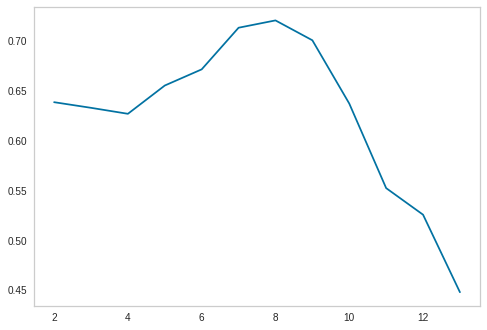

In [ ]:
plt.plot(cluster_list,sil_score)
plt.grid()

In [ ]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(result.drop("Factors",axis=1))

KMeans(random_state=0)

In [ ]:
result['K_means_segments'] = kmeans.labels_

In [ ]:
cluster_profile = result.groupby('K_means_segments').mean()

In [ ]:
cluster_profile['count_in_each_segments'] = result.groupby('K_means_segments')['Factors'].count().values

In [ ]:
cluster_profile.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='K_means_segments')

In [ ]:
result

sharpe ratio      risk  \
Hedge Fund                            9.558524  0.171891   
Factor - Low Risk                     5.966523  0.168723   
Factor - Value vs Growth             -1.100311  0.158645   
Factor - Fixed Income Carry           0.118208  0.139333   
Factor - Local Equity                -1.329579  0.146495   
Factor - Trend Following              6.712191  0.163072   
Factor - Commodities                 -2.403896  0.142890   
Factor - Equity                       5.996421  0.201632   
Factor - Foreign Exchange Carry      -0.114379  0.141468   
Factor - Small Cap                   -2.939700  0.134086   
Factor - Emerging Markets            -3.472577  0.144397   
Factor - Foreign Currency             1.605196  0.136028   
Factor - Local Inflation              2.829848  0.149579   
Factor - Equity Short Volatility      1.779916  0.136363   
Factor - Credit                       0.267683  0.165783   
Factor - Interest Rates               4.697791  0.098294   
Factor - Crowding                     4.562730  0.094845   
Factor - Momentum                     5.814383  0.178842   
Factor - Quality                     10.161853  0.125232   

                                                           Factors  \
Hedge Fund                                              Hedge Fund   
Factor - Low Risk                                Factor - Low Risk   
Factor - Value vs Growth                  Factor - Value vs Growth   
Factor - Fixed Income Carry            Factor - Fixed Income Carry   
Factor - Local Equity                        Factor - Local Equity   
Factor - Trend Following                  Factor - Trend Following   
Factor - Commodities                          Factor - Commodities   
Factor - Equity                                    Factor - Equity   
Factor - Foreign Exchange Carry    Factor - Foreign Exchange Carry   
Factor - Small Cap                              Factor - Small Cap   
Factor - Emerging Markets                Factor - Emerging Markets   
Factor - Foreign Currency                Factor - Foreign Currency   
Factor - Local Inflation                  Factor - Local Inflation   
Factor - Equity Short Volatility  Factor - Equity Short Volatility   
Factor - Credit                                    Factor - Credit   
Factor - Interest Rates                    Factor - Interest Rates   
Factor - Crowding                                Factor - Crowding   
Factor - Momentum                                Factor - Momentum   
Factor - Quality                                  Factor - Quality   

                                  K_means_segments  
Hedge Fund                                       4  
Factor - Low Risk                                2  
Factor - Value vs Growth                         7  
Factor - Fixed Income Carry                      3  
Factor - Local Equity                            7  
Factor - Trend Following                         2  
Factor - Commodities                             1  
Factor - Equity                                  2  
Factor - Foreign Exchange Carry                  3  
Factor - Small Cap                               1  
Factor - Emerging Markets                        1  
Factor - Foreign Currency                        6  
Factor - Local Inflation                         0  
Factor - Equity Short Volatility                 6  
Factor - Credit                                  3  
Factor - Interest Rates                          5  
Factor - Crowding                                5  
Factor - Momentum                                2  
Factor - Quality                                 4

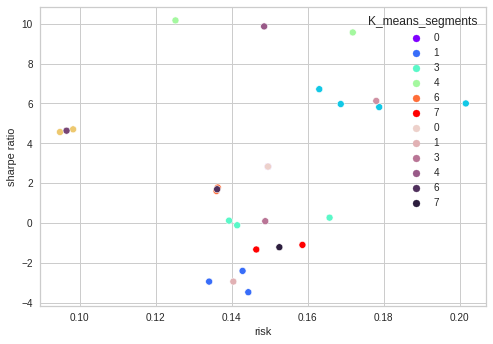

In [ ]:
stuff=result.iloc[0:19,0:2]
sns.scatterplot(
   data=stuff,
    x='risk',y='sharpe ratio',
    hue=result["K_means_segments"],
    palette="rainbow"
)
sns.scatterplot(data=cluster_profile.iloc[0:19,0:2],x='risk',y='sharpe ratio',hue=cluster_profile.index)

In [ ]:
stuff

sharpe ratio      risk
Hedge Fund                            9.558524  0.171891
Factor - Low Risk                     5.966523  0.168723
Factor - Value vs Growth             -1.100311  0.158645
Factor - Fixed Income Carry           0.118208  0.139333
Factor - Local Equity                -1.329579  0.146495
Factor - Trend Following              6.712191  0.163072
Factor - Commodities                 -2.403896  0.142890
Factor - Equity                       5.996421  0.201632
Factor - Foreign Exchange Carry      -0.114379  0.141468
Factor - Small Cap                   -2.939700  0.134086
Factor - Emerging Markets            -3.472577  0.144397
Factor - Foreign Currency             1.605196  0.136028
Factor - Local Inflation              2.829848  0.149579
Factor - Equity Short Volatility      1.779916  0.136363
Factor - Credit                       0.267683  0.165783
Factor - Interest Rates               4.697791  0.098294
Factor - Crowding                     4.562730  0.094845
Factor - Momentum                     5.814383  0.178842
Factor - Quality                     10.161853  0.125232